In [1]:
import numpy as np
import pyDR as DR
from pyDR.Project import Project
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
import pickle
import os
from copy import deepcopy

In [2]:
ile_resn = [3, 13, 23, 30, 36, 44, 61]
#test_list = ["test_001", "test_002", "test_003", "test_004", "test_007", "test_008", "test_009", "test_010", "test_011"]
test_list =["test_001", "test_002", "test_011", "test_003", "test_009", "test_010", "test_012"]
color_list = ["lightcoral","firebrick","maroon","darkgreen","cornflowerblue","royalblue","gold", "grey"]

In [3]:
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", color_list)

In [4]:
data = []
for test in test_list:
    out=pickle.load(open("./out_figures/ile/"+test+"/out4.p", 'rb'))
    data.append(out)

In [5]:
data[0][-1]["ct_prod"].shape

(42, 400001)

In [6]:
tf=200000
t=np.arange(tf>>1)*.005

In [7]:
def creat_split_plots(out, save=None, show=True):    
    titles=[['Methyl rot.',r'$\chi_2$ rot.',r'$\chi_1$ rot.',r'C$\alpha$-C$\beta$ motion','Total'],
                ['Methyl rot.',r'$\chi_2$ rot.',r'$\chi_1$ rot.',r'C$\alpha$-C$\beta$ motion','Total'],
                ['Methyl lib.','Methyl hop.',r'$\chi_2$ lib.',r'$\chi_2$ hop.',
                r'$\chi_1$ lib.',r'$\chi_1$ hop.',r'C$\alpha$-C$\beta$ motion','Total']]
    fig=plt.figure('Methyl Dynamics')
    fig.clear()
    fig.set_size_inches([10.27,  9.03])
    ax=[]
    ax.append([fig.add_subplot(5,3,k+1) for k in range(0,15,3)])
    ax.append([fig.add_subplot(5,3,k+1) for k in range(1,15,3)])
    ax.append([fig.add_subplot(5,6,k+1) for k in [4,5,10,11,16,17,22]])
    ax[-1].append(fig.add_subplot(5,3,15))

    for a0,t0 in zip(ax,titles):
        for a, title in zip(a0,t0):
            a.set_title(title)

    i = 0
    j = 0
    for inc,ax0 in zip(range(3),ax):
        i += 1 
        out_include = out[inc]       
        for ct,a in zip(out_include['ct_finF'],ax0):
            j += 1
            try:
                a.cla()
                a.plot(t,ct.mean(0)[:tf>>1])
                a.set_ylim([0,1.05])
                S2=ct.mean(0)[tf>>2:tf>>1].mean()
                b=np.argwhere(ct.mean(0)-S2<0)[0,0]
                #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
                tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
                fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
                S2,tc=least_squares(fun,[S2,tc0]).x
                a.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
                a.set_xlim([0,50*tc])
                #a.set_xlim([0,np.min([10*tc, out['t'][:tf>>1]])])
                a.set_title(f"{i}-{j}")
            except:
                pass
        ax0[-1].semilogx(out_include['t'][:tf>>1],out_include['ct'].mean(0)[:tf>>1])
        ax0[-1].semilogx(out_include['t'][:tf>>1],out_include['ct_prod'].mean(0)[:tf>>1])
        ax0[-1].set_ylim([0,.5])
        
    fig.set_size_inches([180/25.4,220/25.4])

    if save:
        plt.savefig("./out_figures/ile/"+save+"/split_plot.pdf")

    if show:
        plt.show()
    else:
        plt.close()

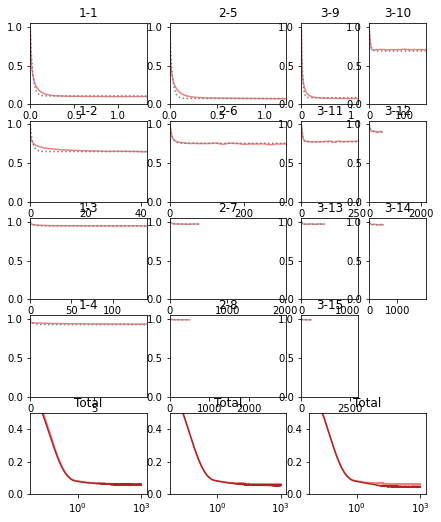

In [8]:
creat_split_plots(data[0])

In [9]:
for d, name in zip(data, test_list):
    creat_split_plots(d, save=name, show=False)

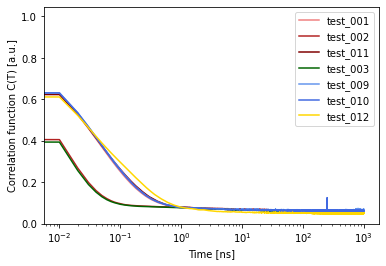

In [10]:
for out in [x[-1] for x in data]:
        plt.semilogx(out['t'][:tf>>1],out['ct'].mean(0)[:tf>>1])
#for out in [x[-1] for x in data]:
#        plt.semilogx(out['t'][:tf>>1],out['ct_prod'].mean(0)[:tf>>1],color='grey',linestyle=':')
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Total Correlation Function")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot00.png")

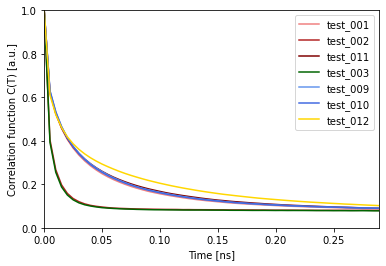

In [11]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][0]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][0]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of methyl rotations")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot01.png")

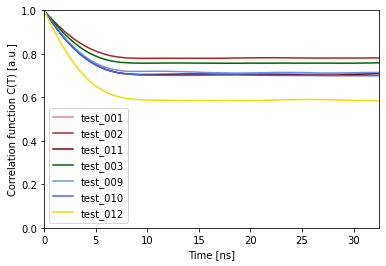

In [12]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][1]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][1]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi2")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot02.png")

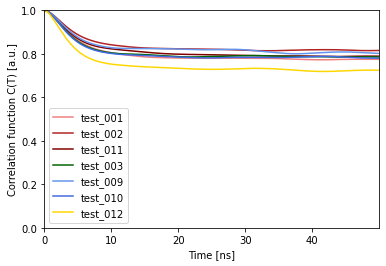

In [13]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][2]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][2]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0, 10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi1")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot03.png")

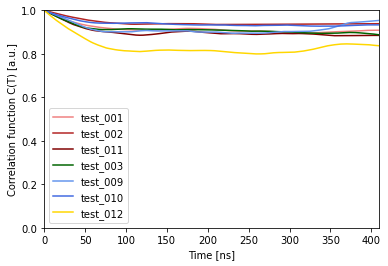

In [14]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][3]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][3]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0, 10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of the backbone")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot04.png")

In [15]:
ile_test_list_3 = [x+"_ile3" for x in test_list]

In [16]:
ile_test_list_44 = [x+"_ile44" for x in test_list]

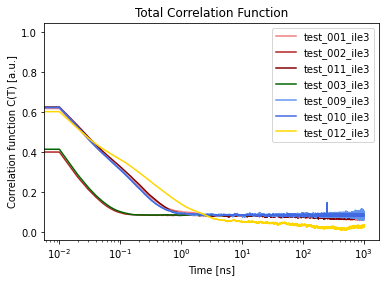

In [39]:
for out in [x[-1] for x in data]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][0:6].mean(0)[:tf>>1])
#for out in [x[-1] for x in data]:
#        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function")
plt.legend(ile_test_list_3+ile_test_list_44)
plt.savefig("./out_figures/report/plot_ile.png")

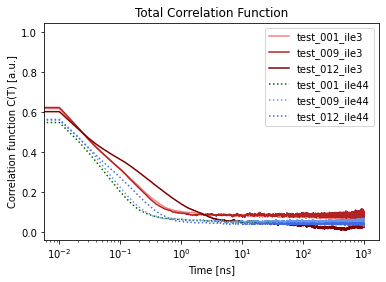

In [18]:
picks=[0,-3,-1]
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][0:6].mean(0)[:tf>>1])
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function")
plt.legend([ile_test_list_3[x] for x in picks]+[ile_test_list_44[x] for x in picks])
plt.savefig("./out_figures/report/plot_ile.png")

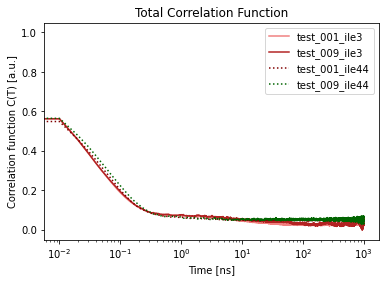

In [19]:
picks=[0,-3]
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][6:12].mean(0)[:tf>>1])
for out in [x[-1] for x in [data[x] for x in picks]]:
        plt.semilogx(out['t'][:tf>>1],out['ct'][30:36].mean(0)[:tf>>1], linestyle=':')
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
plt.title("Total Correlation Function")
plt.legend([ile_test_list_3[x] for x in picks]+[ile_test_list_44[x] for x in picks])
plt.savefig("./out_figures/report/plot_ile.png")

## ILE 13

In [20]:
data[0][-1]['ct_finF'].shape

(7, 42, 400001)

/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in square
  if sys.path[0] == "":


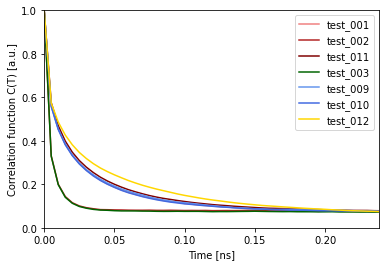

In [21]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][0]
    plt.plot(t,ct[6:12].mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][0]
    ct=ct[6:12]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of methyl rotations")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot01.png")

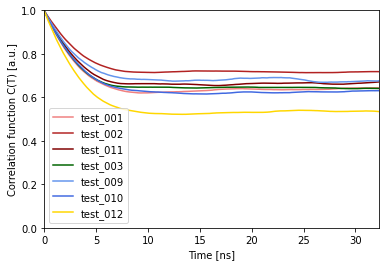

In [22]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][1]
    ct=ct[6:12]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][1]
    ct=ct[6:12]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0,10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi2")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot02.png")

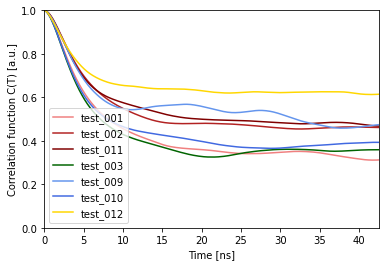

In [23]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][2]
    ct=ct[6:12]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][2]
    ct=ct[6:12]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0, 10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi1")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot03.png")

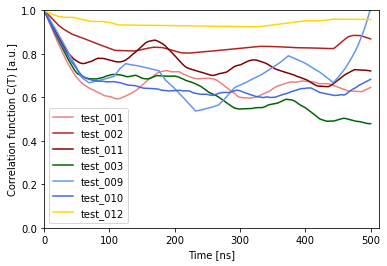

In [24]:
for out in [x[-1] for x in data]:    
    ct = out['ct_finF'][3]
    ct=ct[6:12]
    plt.plot(t,ct.mean(0)[:tf>>1])
plt.legend(test_list)
for out in [x[-1] for x in data]:
    ct = out['ct_finF'][3]
    ct=ct[6:12]
    S2=ct.mean(0)[tf>>2:tf>>1].mean()
    b=np.argwhere(ct.mean(0)-S2<0)[0,0]
    #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
    tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
    fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
    S2,tc=least_squares(fun,[S2,tc0]).x
    #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
plt.xlim([0, 10*tc])
plt.ylim([0,1])
legend_list = test_list + ["fit"]
plt.xlabel("Time [ns]")
plt.ylabel("Correlation function C(T) [a.u.]")
#plt.title("Correlation function of chi1")
plt.legend(legend_list)
plt.savefig("./out_figures/report/plot03.png")

## all res sep

In [25]:
for ile in ile_resn:
    #os.mkdir("./out_figures/all_res_sep/"+str(ile))
    pass

In [26]:
ile_resn_number_dict = {"3":[0,6],"13":[6,12],"23":[12,18],"30":[18,24],"36":[24,30],"44":[30,36],"61":[36,42]}

In [27]:
type_dict = {0: "Methyl", 1: "Chi1", 2: "Chi2", 3: "Backbone"}

In [28]:
empty_resn_storage = {"3":[],"13":[],"23":[],"30":[],"36":[],"44":[],"61":[]}

In [29]:
s2_storage = {0: deepcopy(empty_resn_storage), 1: deepcopy(empty_resn_storage), 2: deepcopy(empty_resn_storage), 3: deepcopy(empty_resn_storage)}
tc_storage = {0: deepcopy(empty_resn_storage), 1: deepcopy(empty_resn_storage), 2: deepcopy(empty_resn_storage), 3: deepcopy(empty_resn_storage)}
s22_storage = {0: deepcopy(empty_resn_storage), 1: deepcopy(empty_resn_storage), 2: deepcopy(empty_resn_storage), 3: deepcopy(empty_resn_storage)}

In [30]:
def ile_cor_func_plot(data, resn, type):
    for out in [x[-1] for x in data]:    
        ct = out['ct_finF'][type]
        ct=ct[ile_resn_number_dict[resn][0]:ile_resn_number_dict[resn][1]]
        plt.plot(t,ct.mean(0)[:tf>>1])
    plt.legend(test_list)
    for out in [x[-1] for x in data]:
        try:
            ct = out['ct_finF'][type]
            ct=ct[ile_resn_number_dict[resn][0]:ile_resn_number_dict[resn][1]]
            S2=ct.mean(0)[tf>>2:tf>>1].mean()
            S2_var=ct.mean(0)[tf>>2:tf>>1].var()
            s2_storage[type][resn].append((S2, S2_var))

            b=np.argwhere(ct.mean(0)-S2<0)[0,0]
            #tc0=np.max([.001,((ct.mean(0)[:b]-S2)/(1-S2)).sum()*.005])
            tc0=t[np.argmin(np.abs((ct.mean(0)[:b]-S2)/(1-S2)-np.exp(-1)))]
            fun=lambda x:(((x[0]+(1-x[0])*np.exp(-t[:b]/x[1]))-ct.mean(0)[:b])**2).sum()
            S2,tc=least_squares(fun,[S2,tc0]).x
            tc_storage[type][resn].append((tc, 0))
            s22_storage[type][resn].append((S2, 0))
            #plt.plot(t,S2+(1-S2)*np.exp(-t/tc),color='grey',linestyle=':')
        except:
            tc = 50
    else:
        plt.xlim([0, 10*tc])
    plt.ylim([0,1])
    legend_list = test_list
    plt.xlabel("Time [ns]")
    plt.ylabel("Correlation function C(T) [a.u.]")
    plt.title(f"{type_dict[type]}-Correlation function of resn {resn}")
    plt.legend(legend_list)
    plt.savefig(f"./out_figures/all_res_sep/{resn}/{type}_cor_func.pdf")
    plt.close()

In [31]:
data[0][-1]['ct_finF'][3][ile_resn_number_dict["30"][0]:ile_resn_number_dict["30"][1]]

array([[1.0000001 , 1.0000001 , 1.0000001 , ..., 1.0222648 , 1.1024388 ,
        0.9845618 ],
       [1.0000001 , 1.        , 1.0000004 , ..., 1.0227493 , 0.972606  ,
        1.0320954 ],
       [1.        , 1.        , 1.0000006 , ..., 1.0292732 , 1.0259116 ,
        1.0363069 ],
       [1.        , 1.0000001 , 1.0000005 , ..., 1.0162169 , 1.0165673 ,
        1.0329783 ],
       [1.0000001 , 1.0000005 , 1.0000004 , ..., 1.0113055 , 0.9554401 ,
        1.0336037 ],
       [1.0000001 , 1.        , 1.0000005 , ..., 1.0181776 , 1.0143884 ,
        0.95182043]], dtype=float32)

In [32]:
for resn in [str(x) for x in ile_resn]:
    for type in [0,1,2,3]:
        try:
            ile_cor_func_plot(data, resn, type)
        except ValueError as e:
            print(e)
            print(f"{resn} {type}")
            continue

/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: overflow encountered in square
/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in true_divide
/home/mlehner/.conda/envs/pyDR/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning

In [33]:
len(s2_storage[3]["13"])

7

In [34]:
test_list

['test_001',
 'test_002',
 'test_011',
 'test_003',
 'test_009',
 'test_010',
 'test_012']

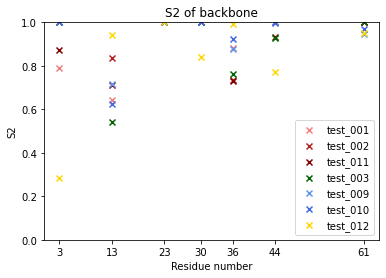

In [35]:
fig, ax = plt.subplots()
for i, test in enumerate(test_list):
    ax.scatter(x=ile_resn, y=[x[i][0] for x in s2_storage[3].values()], label=test, marker="x")
    #ax.errorbar(x=ile_resn, y=[x[i][0] for x in s2_storage[3].values()], yerr=[x[i][1] for x in s2_storage[3].values()], fmt='o')
ax.set_ylim([0,1])
ax.set_xlabel("Residue number")
ax.set_xticks(ile_resn)
ax.set_ylabel("S2")
ax.set_title("S2 of backbone")
ax.legend()

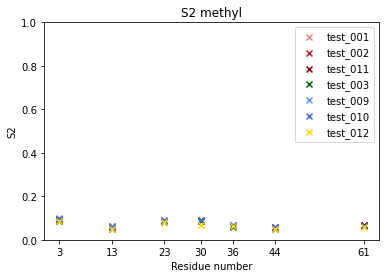

In [36]:
fig, ax = plt.subplots()
for i, test in enumerate(test_list):
    ax.scatter(x=ile_resn, y=[x[i][0] for x in s2_storage[0].values()], label=test, marker="x")
    #ax.errorbar(x=ile_resn, y=[x[i][0] for x in s2_storage[3].values()], yerr=[x[i][1] for x in s2_storage[3].values()], fmt='o')
ax.set_ylim([0,1])
ax.set_xlabel("Residue number")
ax.set_xticks(ile_resn)
ax.set_ylabel("S2")
ax.set_title("S2 methyl")
ax.legend()

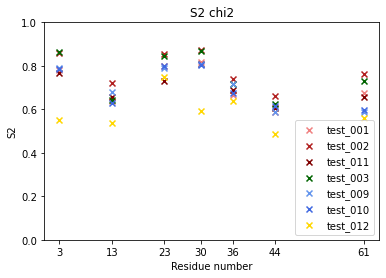

In [37]:
fig, ax = plt.subplots()
for i, test in enumerate(test_list):
    ax.scatter(x=ile_resn, y=[x[i][0] for x in s2_storage[1].values()], label=test, marker="x")
    #ax.errorbar(x=ile_resn, y=[x[i][0] for x in s2_storage[3].values()], yerr=[x[i][1] for x in s2_storage[3].values()], fmt='o')
ax.set_ylim([0,1])
ax.set_xlabel("Residue number")
ax.set_xticks(ile_resn)
ax.set_ylabel("S2")
ax.set_title("S2 chi2")
ax.legend()

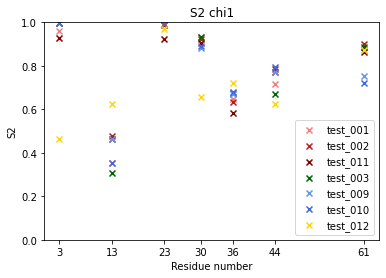

In [38]:
fig, ax = plt.subplots()
for i, test in enumerate(test_list):
    ax.scatter(x=ile_resn, y=[x[i][0] for x in s2_storage[2].values()], label=test, marker="x")
    #ax.errorbar(x=ile_resn, y=[x[i][0] for x in s2_storage[3].values()], yerr=[x[i][1] for x in s2_storage[3].values()], fmt='o')
ax.set_ylim([0,1])
ax.set_xlabel("Residue number")
ax.set_xticks(ile_resn)
ax.set_ylabel("S2")
ax.set_title("S2 chi1")
ax.legend()